In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [4]:
file = 'terrorism_cleanup.csv'

In [5]:
data = pd.read_csv(file, encoding="ISO-8859-1")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181683 entries, 0 to 181682
Data columns (total 13 columns):
year                181683 non-null int64
month               181683 non-null int64
day                 181683 non-null int64
country_name        181683 non-null object
region              181683 non-null int64
region_txt          181683 non-null object
city                181249 non-null object
latitude            177129 non-null float64
longitude           177128 non-null float64
attack_type`        181683 non-null object
target_type         181683 non-null object
nationality_type    180124 non-null object
weapon_type         181683 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 18.0+ MB


In [7]:
#by region text
region_name = data.groupby("region_txt")

region_grouped = region_name[["region_txt"]].count()

print(region_grouped)

                             region_txt
region_txt                             
Australasia & Oceania               282
Central America & Caribbean       10344
Central Asia                        563
East Asia                           802
Eastern Europe                     5144
Middle East & North Africa        50472
North America                      3456
South America                     18978
South Asia                        44971
Southeast Asia                    12485
Sub-Saharan Africa                17550
Western Europe                    16636


In [8]:
region_grouped.sort_values(by=['region_txt'], ascending=False)

C:\Users\tusca\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'region_txt' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,region_txt
region_txt,
Middle East & North Africa,50472
South Asia,44971
South America,18978
Sub-Saharan Africa,17550
Western Europe,16636
Southeast Asia,12485
Central America & Caribbean,10344
Eastern Europe,5144
North America,3456


In [9]:
#by country
country_name = data.groupby("country_name")

country_grouped = country_name[["country_name"]].count()

In [10]:
country_grouped.sort_values(by=['country_name'], ascending=False)

C:\Users\tusca\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'country_name' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,country_name
country_name,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11957
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


In [11]:
#by attack
attack_group = data.groupby("attack_type`")

attack_grouped = attack_group[["attack_type`"]].count()

In [41]:
attack_grouped.sort_values(by=['attack_type`'])

C:\Users\tusca\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'attack_type`' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,attack_type`
attack_type`,
Hijacking,659
Hostage Taking (Barricade Incident),991
Unarmed Assault,1015
Unknown,7273
Facility/Infrastructure Attack,10355
Hostage Taking (Kidnapping),11157
Assassination,19312
Armed Assault,42668
Bombing/Explosion,88253


In [44]:
data.rename(columns={'year':'Year','month':'Month','day':'Day','country_name':'Country','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','attack_type`':'AttackType','targtype1_txt':'Target_type','natlty1_txt':'Nationality','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data.head()

,Year,Month,Day,Country,region,Region,City,Latitude,Longitude,AttackType,target_type,nationality_type,weapon_type,Decade Group
0,1970,7,2,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Dominican Republic,Unknown,1970-1979
1,1970,0,0,Mexico,1,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,Unknown,1970-1979
2,1970,1,0,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,United States,Unknown,1970-1979
3,1970,1,0,Greece,8,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),United States,Explosives,1970-1979
4,1970,1,0,Japan,4,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),United States,Incendiary,1970-1979


In [45]:
year_group = data.groupby("Year")

year_grouped = year_group[["Year"]].count()

In [46]:
year_grouped.sort_values(by=['Year'], ascending=False)

C:\Users\tusca\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'Year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,Year
Year,
2014,16903
2015,14965
2016,13587
2013,12036
2017,10892
2012,8522
2011,5076
1992,5071
2010,4826


In [47]:
data1=data[['Year','Month','Day','Country','Region','City','Latitude','Longitude','AttackType','target_type','weapon_type']]
data1.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,target_type,weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary


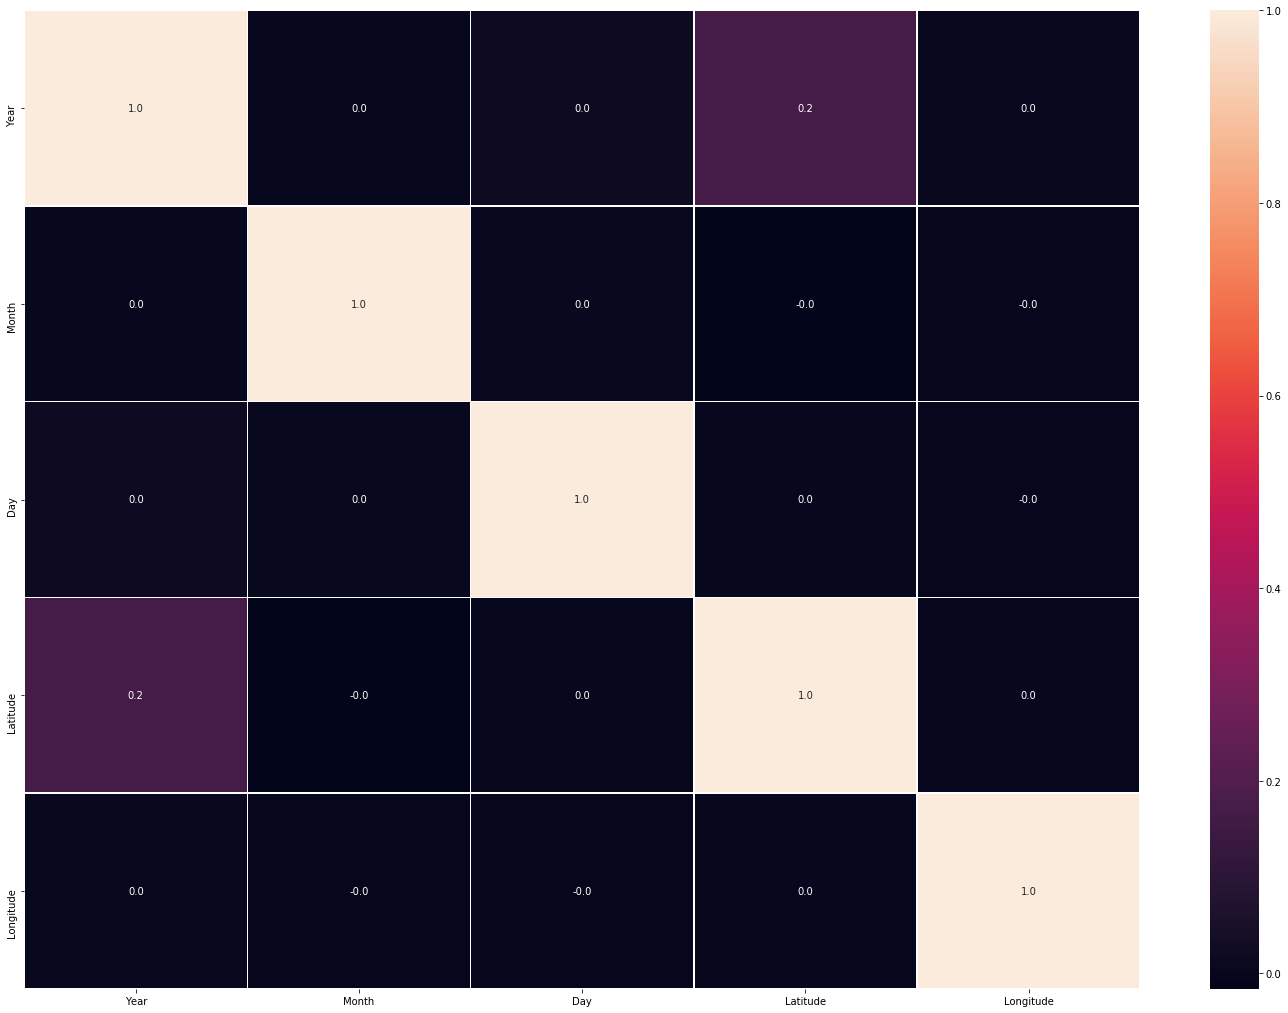

In [48]:
f,ax = plt.subplots(figsize=(25, 18))
sns.heatmap(data1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

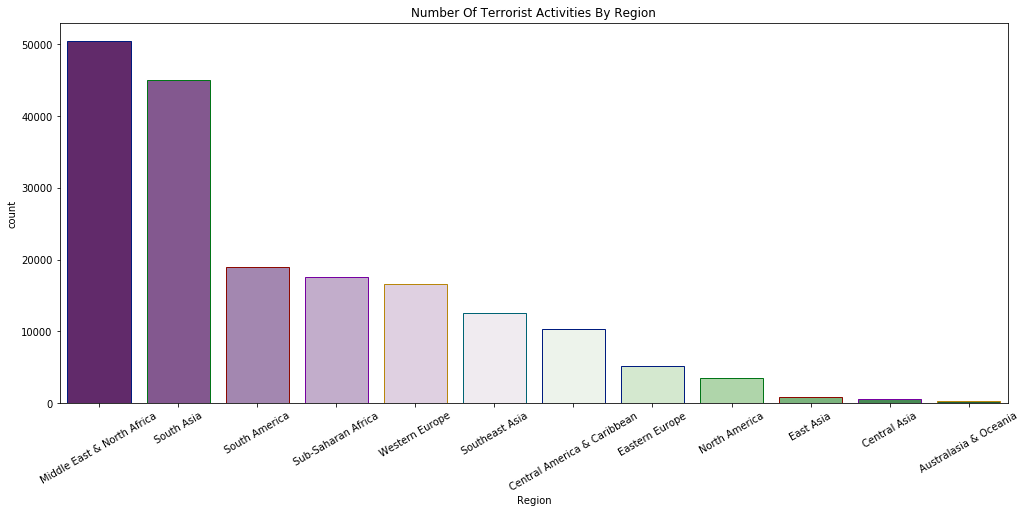

In [49]:
plt.subplots(figsize=(17,7))
sns.countplot('Region',data=data,palette='PRGn',edgecolor=sns.color_palette('dark',7),order=data['Region'].value_counts().index)
plt.xticks(rotation=30)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

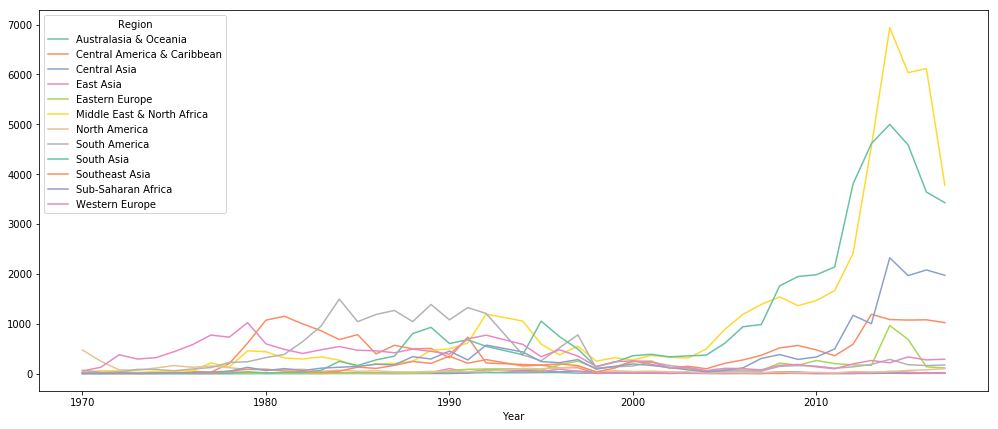

In [50]:
terror_region=pd.crosstab(data.Year,data.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(17,7)
plt.show()

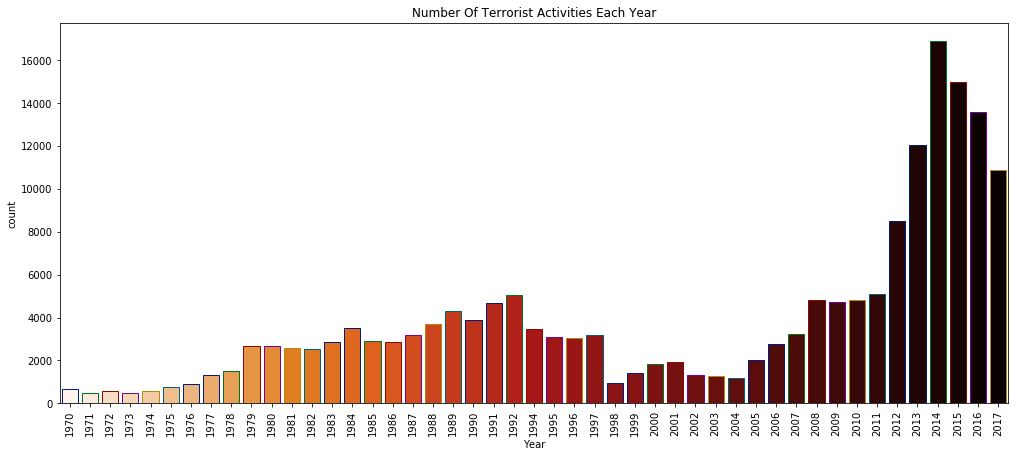

In [51]:
plt.subplots(figsize=(17,7))
sns.countplot('Year',data=data, palette='gist_heat_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

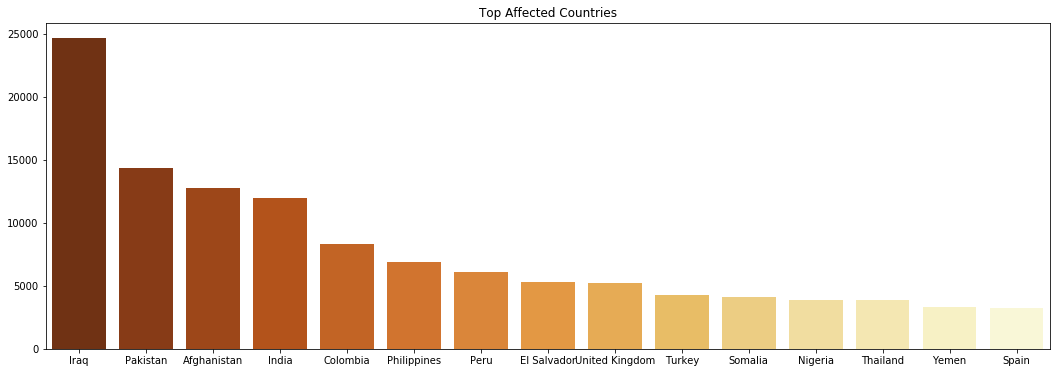

In [52]:
plt.subplots(figsize=(18,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='YlOrBr_r')
plt.title('Top Affected Countries')
plt.show()

In [35]:
# Create bins in which to place values based upon decade
bins = [0, 1969, 1979, 1989, 1999, 2009, 2019]

In [36]:
group_labels = ["<=1969", "1970-1979", "1980-1989", "1990-1999", "2000-2009", "2010-2017"]

In [37]:
data["Decade Group"] = pd.cut(data["Year"], bins, labels=group_labels)
data

,Year,Month,Day,Country,region,Region,City,Latitude,Longitude,attack_type`,target_type,nationality_type,weapon_type,Decade Group
0,1970,7,2,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Dominican Republic,Unknown,1970-1979
1,1970,0,0,Mexico,1,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,Unknown,1970-1979
2,1970,1,0,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,United States,Unknown,1970-1979
3,1970,1,0,Greece,8,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),United States,Explosives,1970-1979
4,1970,1,0,Japan,4,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),United States,Incendiary,1970-1979
5,1970,1,1,United States,1,North America,Cairo,37.005105,-89.176269,Armed Assault,Police,United States,Firearms,1970-1979
6,1970,1,2,Uruguay,3,South America,Montevideo,-34.891151,-56.187214,Assassination,Police,Uruguay,Firearms,1970-1979
7,1970,1,2,United States,1,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,Utilities,United States,Explosives,1970-1979
8,1970,1,2,United States,1,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,Military,United States,Incendiary,1970-1979
9,1970,1,3,United States,1,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,Government (General),United States,Incendiary,1970-1979


In [21]:
attack_count = terrorism_csv["year"].count()
attack_count

181683

In [22]:
decade_grouped = terrorism_csv.groupby("Decade Group")

In [23]:
# Count total players by age category
total_decade = decade_grouped["year"].count()

In [24]:
# Calculate percentages by age category 
percentage_by_decade = (total_decade/attack_count) * 100

In [53]:
decade_final = pd.DataFrame({"% of attacks per decade": percentage_by_decade, "Total Count": total_decade})

In [62]:
decade_df = decade_final.drop(['<=1969'])
decade_df

,% of attacks per decade,Total Count
1970-1979,5.456757,9914
1980-1989,17.150752,31160
1990-1999,15.830870,28762
2000-2009,13.782247,25040
2010-2017,47.779374,86807


In [68]:
decade_percentage = decade_df.drop(['Total Count'], axis=1)
decade_percentage

,% of attacks per decade
1970-1979,5.456757
1980-1989,17.150752
1990-1999,15.830870
2000-2009,13.782247
2010-2017,47.779374


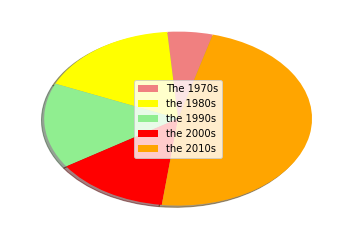

In [70]:
# Build Pie Chart
labels = ["The 1970s", "the 1980s","the 1990s", "the 2000s", "the 2010s"]
colors = ["lightcoral", "yellow", "lightgreen", "red", "orange"]
explode = (0, 0, 0, 0, 0)
plt.pie(decade_percentage, explode=explode, colors=colors, autopct=None, shadow=True, startangle=75)
legend = plt.legend(labels, loc="center")


# Show Figure
plt.show()

In [30]:
region_name = data.groupby("Region")

region_grouped = region_name[["Region"]].count()

region_grouped

,Region
Region,
Australasia & Oceania,282
Central America & Caribbean,10344
Central Asia,563
East Asia,802
Eastern Europe,5144
Middle East & North Africa,50472
North America,3456
South America,18978
South Asia,44971


In [31]:
region_count = region_grouped["Region"].sum()
region_count

181683

In [32]:
percentage_by_region = (region_grouped/region_count) * 100
percentage_by_region

,Region
Region,
Australasia & Oceania,0.155215
Central America & Caribbean,5.693433
Central Asia,0.309880
East Asia,0.441428
Eastern Europe,2.831305
Middle East & North Africa,27.780255
North America,1.902214
South America,10.445666
South Asia,24.752453


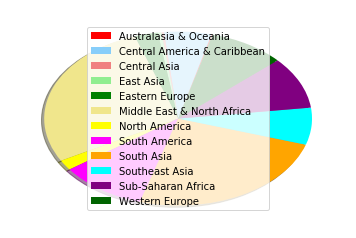

In [56]:
# Build Pie Chart
labels = ["Australasia & Oceania","Central America & Caribbean","Central Asia", "East Asia", "Eastern Europe", "Middle East & North Africa", "North America", "South America", "South Asia", "Southeast Asia", "Sub-Saharan Africa", "Western Europe"]
colors = ["red", "lightskyblue", "lightcoral", "lightgreen", "green", "khaki", "yellow", "magenta", "orange", "cyan", "purple", "darkgreen"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(percentage_by_region, explode=explode, colors=colors, autopct=None, shadow=True, startangle=75)
legend = plt.legend(labels, loc="center")


# Show Figure
plt.show()

,% of attacks per region,Total Count
0,region_txt region...,181683
